## Install and import libraries

In [1]:
pip install google-play-scraper nltk textblob

Note: you may need to restart the kernel to use updated packages.


In [211]:
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

from google_play_scraper import app, Sort, reviews_all
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [138]:
nltk.download('punkt')
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WT\AppData\Roaming\nltk_data...


True

## Scrape google play user reviews

In [3]:
app_reviews = reviews_all(
        "my.com.tngdigital.ewallet",
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )

In [4]:
df = pd.DataFrame(np.array(app_reviews),columns=['review'])
df2 = df.join(pd.DataFrame(df.pop('review').tolist()))

In [92]:
reviews_df = df2[['content', 'score']]

## Text Preprocessing

In [161]:
reviews_df['content'] = reviews_df['content'].astype(str)
reviews_df['content']= reviews_df['content'].apply(lambda x: x.lower())

C:\Users\WT\AppData\Local\Temp\ipykernel_19252\1868447951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['content'] = reviews_df['content'].astype(str)
C:\Users\WT\AppData\Local\Temp\ipykernel_19252\1868447951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['content']= reviews_df['content'].apply(lambda x: x.lower())


In [162]:
extracted_text=[]

def extract_reviews(s):
    expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return expe.sub(r'',s)

for y in reviews_df['content']:
    extracted_text.append(str(extract_reviews(y)))

In [163]:
stop_words = stopwords.words('english')

## Stop Words (Token Frequency)

In [164]:
tokenized_word_list = [word_tokenize(i) for i in extracted_text]
tokens = sum(tokenized_word_list, [])
tokens = [words for words in tokens if not words in stop_words]
tokens_df = pd.DataFrame(tokens)

In [165]:
sia = SentimentIntensityAnalyzer()

tokens_sentiment = []
for tk in tokens:
  tokens_sentiment.append(sia.polarity_scores(tk))

In [166]:
tokens_sentiment_df = tokens_df.join(pd.DataFrame.from_dict(tokens_sentiment))

In [196]:
pos_tokens = tokens_sentiment_df[tokens_sentiment_df['pos'] == 1.0]
neg_tokens = tokens_sentiment_df[tokens_sentiment_df['neg'] == 1.0]

<Figure size 640x480 with 0 Axes>

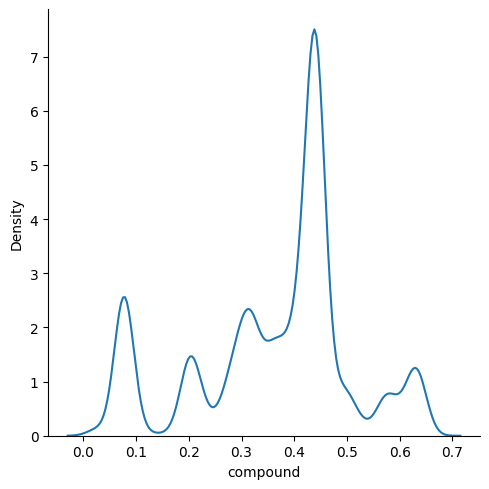

In [206]:
sns.displot(pos_tokens, x="compound", kind="kde")
plt.show()

<Figure size 640x480 with 0 Axes>

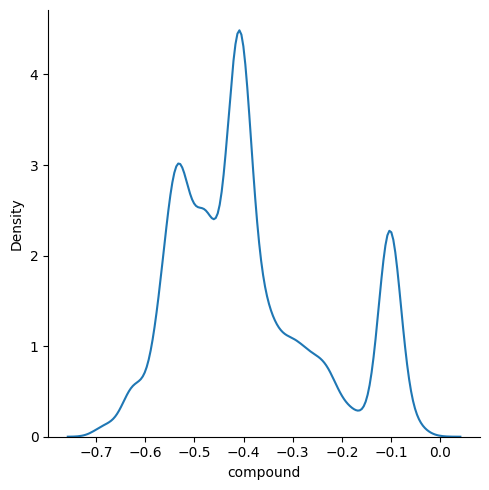

In [207]:
plt.clf()
sns.displot(neg_tokens, x="compound", kind="kde")
plt.show()

In [215]:
pos_tokens = pos_tokens[pos_tokens['compound'] > 0.3]
neg_tokens = neg_tokens[neg_tokens['compound'] < -0.3]

## N-gram

In [97]:
# reviews_df = reviews_df.assign(extracted_text = extracted_text)
# reviews_df['extracted_text'] = reviews_df['extracted_text'].apply(lambda x: x if x not in stop_words else None)

## Write Data to file

In [216]:
with open('pos_tokens.txt', 'w') as f:
  for tk in pos_tokens[0]:
    f.write("%s " % tk)

In [217]:
with open('neg_tokens.txt', 'w') as f:
  for tk in neg_tokens[0]:
    f.write("%s " % tk)

In [98]:
# reviews_df = reviews_df.dropna()

In [99]:
# with open('tng_play_store_reviews.txt', 'w') as f:
#   for review in reviews_df['extracted_text']:
#     f.write(review)